# Combine IMERG and IBTrACS

In [239]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [240]:
import math

import ocha_stratus as stratus
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from src.datasources import ibtracs
from src.constants import *

In [241]:
df_storms = ibtracs.load_storms()

In [242]:
df_storms

,storm_id,sid,atcf_id,season,number,name,provisional,created_at
0,0eae9884-5a95-427e-813f-24b6948adfc8,1842298N11080,None,1842,1,UNNAMED,False,2025-05-13 23:12:11.828324
1,654c51b2-e783-4ebc-9089-d760f2550a19,1845336N10074,None,1845,1,UNNAMED,False,2025-05-13 23:12:11.828324
2,78e5587a-6792-4336-81f3-ab3a2fda026c,1848011S09079,None,1848,1,UNNAMED,False,2025-05-13 23:12:11.828324
3,fb2cdc51-02c3-42a2-a22a-5a9dd37da2c7,1848011S09080,None,1848,2,UNNAMED,False,2025-05-13 23:12:11.828324
4,3a0add51-96ee-4a7f-934d-bf0f599673ed,1848011S15057,None,1848,3,UNNAMED,False,2025-05-13 23:12:11.828324
...,...,...,...,...,...,...,...,...
13441,558cd6fb-427b-48d3-aceb-6c0dd51d6697,2025087S14124,SH282025,2025,21,DIANNE,True,2025-05-13 23:12:11.828324
13442,7a4ebb5f-3060-4640-8f1d-3688841b73bc,2025102S11128,SH292025,2025,22,ERROL,True,2025-05-13 23:12:11.828324
13443,73d722e0-b56b-4878-ab91-2e4cb789fe56,2025104S15168,SH302025,2025,23,TAM,True,2025-05-13 23:12:11.828324
13444,b70c74fd-db31-4851-87f0-ab47c6bcbbb7,2025108S11140,SH312025,2025,24,UNNAMED,True,2025-05-13 23:12:11.828324


In [243]:
blob_name = f"{PROJECT_PREFIX}/processed/impact/emdat_cerf_upto2023.parquet"
df_impact = stratus.load_parquet_from_blob(blob_name)

In [244]:
df_impact["cerf"] = ~df_impact["Amount in US$"].isnull()

In [245]:
cols = ["sid", "cerf", "Total Affected"]
df_impact[cols]

,sid,cerf,Total Affected
0,2001303N13276,False,5900012.0
1,2002258N10300,False,42500.0
2,2002265N10315,False,281470.0
3,2004223N11301,False,244005.0
4,2004247N10332,False,3245.0
5,2005186N12299,False,2500000.0
6,2005289N18282,False,100000.0
7,2006161N20275,False,268.0
8,2007225N12331,False,NaN
9,2007297N18300,False,192488.0


In [246]:
blob_name = f"{PROJECT_PREFIX}/processed/storm_stats/zma_stats.parquet"

df_stats_raw = stratus.load_parquet_from_blob(blob_name)

In [247]:
df_stats = df_stats_raw.merge(df_storms)
df_stats

,sid,valid_time_min,valid_time_max,wind_speed_max,max_roll2_mean,storm_id,atcf_id,season,number,name,provisional,created_at
0,1851228N13313,1851-08-19 12:00:00.000040,1851-08-21 12:00:00.000040,70.0,NaN,c46d50a1-0dd8-460f-af91-8fc67dd02a07,AL041851,1851,10,UNNAMED,False,2025-05-13 23:12:11.828324
1,1852232N21293,1852-08-20 12:00:00.000040,1852-08-22 12:00:00.000040,90.0,NaN,e461c1ee-a682-498d-ad84-2bcd5ab276b8,AL011852,1852,4,UNNAMED,False,2025-05-13 23:12:11.828324
2,1852249N17296,1852-09-06 18:00:00.000040,1852-09-06 18:00:00.000040,40.0,NaN,4d639850-9aef-430c-be4f-fb5c014ee070,AL021852,1852,8,UNNAMED,False,2025-05-13 23:12:11.828324
3,1852264N13309,1852-09-27 00:00:00.000040,1852-09-28 00:00:00.000040,80.0,NaN,8827c354-c177-44b7-b9c7-2815411418a6,AL041852,1852,9,UNNAMED,False,2025-05-13 23:12:11.828324
4,1852278N14293,1852-10-07 12:00:00.000040,1852-10-08 06:00:00.000040,90.0,NaN,9ec0a40d-5695-4aad-8f81-2a2685445f00,AL051852,1852,13,UNNAMED,False,2025-05-13 23:12:11.828324
...,...,...,...,...,...,...,...,...,...,...,...,...
468,2024216N20284,2024-08-02 12:00:00.000039,2024-08-04 00:00:00.000039,35.0,43.101876,0cb90303-8912-465c-be27-629f62da4796,AL042024,2024,36,DEBBY,False,2025-05-13 23:12:11.828324
469,2024268N17278,2024-09-24 06:00:00.000039,2024-09-26 06:00:00.000039,75.0,51.583454,fe7f99ba-a789-4f6c-96cf-769370f377d0,AL092024,2024,62,HELENE,False,2025-05-13 23:12:11.828324
470,2024279N21265,2024-10-09 02:05:00.000035,2024-10-09 06:00:00.000039,140.0,4.291707,fa53e725-039b-4a36-bfa6-b7f768c08022,AL142024,2024,72,MILTON,False,2025-05-13 23:12:11.828324
471,2024293N21294,2024-10-20 06:00:00.000039,2024-10-22 12:00:00.000039,75.0,26.294549,9522080e-6ef4-487e-a770-77a1a984dbd6,AL162024,2024,75,OSCAR,False,2025-05-13 23:12:11.828324


In [248]:
cols = ["sid", "cerf", "Total Affected"]
df_stats = df_stats.merge(df_impact[cols], how="left")
df_stats["cerf"] = df_stats["cerf"].fillna(False)

/var/folders/66/764yc5p92nvdc_nm3xmy5rn40000gn/T/ipykernel_95551/302019644.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stats["cerf"] = df_stats["cerf"].fillna(False)


In [249]:
target_rp = 4

In [250]:
df_stats

,sid,valid_time_min,valid_time_max,wind_speed_max,max_roll2_mean,storm_id,atcf_id,season,number,name,provisional,created_at,cerf,Total Affected
0,1851228N13313,1851-08-19 12:00:00.000040,1851-08-21 12:00:00.000040,70.0,NaN,c46d50a1-0dd8-460f-af91-8fc67dd02a07,AL041851,1851,10,UNNAMED,False,2025-05-13 23:12:11.828324,False,NaN
1,1852232N21293,1852-08-20 12:00:00.000040,1852-08-22 12:00:00.000040,90.0,NaN,e461c1ee-a682-498d-ad84-2bcd5ab276b8,AL011852,1852,4,UNNAMED,False,2025-05-13 23:12:11.828324,False,NaN
2,1852249N17296,1852-09-06 18:00:00.000040,1852-09-06 18:00:00.000040,40.0,NaN,4d639850-9aef-430c-be4f-fb5c014ee070,AL021852,1852,8,UNNAMED,False,2025-05-13 23:12:11.828324,False,NaN
3,1852264N13309,1852-09-27 00:00:00.000040,1852-09-28 00:00:00.000040,80.0,NaN,8827c354-c177-44b7-b9c7-2815411418a6,AL041852,1852,9,UNNAMED,False,2025-05-13 23:12:11.828324,False,NaN
4,1852278N14293,1852-10-07 12:00:00.000040,1852-10-08 06:00:00.000040,90.0,NaN,9ec0a40d-5695-4aad-8f81-2a2685445f00,AL051852,1852,13,UNNAMED,False,2025-05-13 23:12:11.828324,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2024216N20284,2024-08-02 12:00:00.000039,2024-08-04 00:00:00.000039,35.0,43.101876,0cb90303-8912-465c-be27-629f62da4796,AL042024,2024,36,DEBBY,False,2025-05-13 23:12:11.828324,False,NaN
469,2024268N17278,2024-09-24 06:00:00.000039,2024-09-26 06:00:00.000039,75.0,51.583454,fe7f99ba-a789-4f6c-96cf-769370f377d0,AL092024,2024,62,HELENE,False,2025-05-13 23:12:11.828324,False,NaN
470,2024279N21265,2024-10-09 02:05:00.000035,2024-10-09 06:00:00.000039,140.0,4.291707,fa53e725-039b-4a36-bfa6-b7f768c08022,AL142024,2024,72,MILTON,False,2025-05-13 23:12:11.828324,False,NaN
471,2024293N21294,2024-10-20 06:00:00.000039,2024-10-22 12:00:00.000039,75.0,26.294549,9522080e-6ef4-487e-a770-77a1a984dbd6,AL162024,2024,75,OSCAR,False,2025-05-13 23:12:11.828324,False,NaN


In [251]:
df_stats_complete = df_stats.dropna(subset=["max_roll2_mean"])

In [252]:
df_stats_complete

,sid,valid_time_min,valid_time_max,wind_speed_max,max_roll2_mean,storm_id,atcf_id,season,number,name,provisional,created_at,cerf,Total Affected
388,2000233N12316,2000-08-24 00:00:00.000040,2000-08-24 12:00:00.000040,40.0,21.746411,f7ca529b-1934-4e43-a012-0241f142ac82,AL072000,2000,67,DEBBY,False,2025-05-13 23:12:11.828324,False,NaN
389,2000259N20273,2000-09-16 00:00:00.000040,2000-09-16 12:00:00.000040,55.0,33.322004,5bd0f222-9499-44d0-bca6-f41ade34425f,AL112000,2000,81,GORDON,False,2025-05-13 23:12:11.828324,False,NaN
390,2000260N15308,2000-09-19 12:00:00.000040,2000-09-21 00:00:00.000040,30.0,36.629167,4bed739e-7c59-4a64-965e-ea6e6053f210,AL122000,2000,83,HELENE,False,2025-05-13 23:12:11.828324,False,NaN
391,2001303N13276,2001-11-03 00:00:00.000040,2001-11-05 06:00:00.000040,120.0,120.507424,76965add-b379-412f-a169-656ced9e36aa,AL152001,2001,88,MICHELLE,False,2025-05-13 23:12:11.828324,False,5900012.0
392,2002258N10300,2002-09-18 18:00:00.000040,2002-09-22 00:00:00.000040,110.0,81.429310,029a08e1-1729-4c36-b7ec-20caec8a0274,AL102002,2002,68,ISIDORE,False,2025-05-13 23:12:11.828324,False,42500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2024216N20284,2024-08-02 12:00:00.000039,2024-08-04 00:00:00.000039,35.0,43.101876,0cb90303-8912-465c-be27-629f62da4796,AL042024,2024,36,DEBBY,False,2025-05-13 23:12:11.828324,False,NaN
469,2024268N17278,2024-09-24 06:00:00.000039,2024-09-26 06:00:00.000039,75.0,51.583454,fe7f99ba-a789-4f6c-96cf-769370f377d0,AL092024,2024,62,HELENE,False,2025-05-13 23:12:11.828324,False,NaN
470,2024279N21265,2024-10-09 02:05:00.000035,2024-10-09 06:00:00.000039,140.0,4.291707,fa53e725-039b-4a36-bfa6-b7f768c08022,AL142024,2024,72,MILTON,False,2025-05-13 23:12:11.828324,False,NaN
471,2024293N21294,2024-10-20 06:00:00.000039,2024-10-22 12:00:00.000039,75.0,26.294549,9522080e-6ef4-487e-a770-77a1a984dbd6,AL162024,2024,75,OSCAR,False,2025-05-13 23:12:11.828324,False,NaN


In [253]:
total_years = df_stats_complete["season"].nunique()

In [262]:
total_years

25

In [254]:
target_year_count = math.floor((total_years + 1) / target_rp)

In [265]:
target_year_count = 7

In [264]:
26 / 7

3.7142857142857144

In [266]:
dicts = []

# check for each Cat limit
for cat_limit in CAT_LIMITS + [(0, None)]:
    dff = df_stats_complete[
        df_stats_complete["wind_speed_max"] >= cat_limit[0]
    ].copy()
    dff = dff.sort_values("max_roll2_mean", ascending=False)

    for rain_thresh in dff["max_roll2_mean"]:
        dfff = dff[dff["max_roll2_mean"] >= rain_thresh]
        trigger_year_count = dfff["season"].nunique()
        if trigger_year_count > target_year_count:
            break
        dict_out = {
            "max_roll2_mean": rain_thresh,
            "cat": cat_limit[1],
            "wind_speed_max": cat_limit[0],
            "trigger_year_count": trigger_year_count,
            "overall_rp": (total_years + 1) / dfff["season"].nunique(),
        }
    if dict_out["trigger_year_count"] == target_year_count:
        dicts.append(dict_out)

# check for windspeed-only
dff = df_stats_complete.sort_values("wind_speed_max", ascending=False).copy()
for wind_thresh in dff["wind_speed_max"]:
    dfff = dff[dff["wind_speed_max"] >= wind_thresh]
    trigger_year_count = dfff["season"].nunique()
    if trigger_year_count > target_year_count:
        break
    dict_out = {
        "max_roll2_mean": None,
        "cat": None,
        "wind_speed_max": wind_thresh,
        "trigger_year_count": trigger_year_count,
        "overall_rp": (total_years + 1) / dfff["season"].nunique(),
    }
dicts.append(dict_out)

df_threshs = pd.DataFrame(dicts)

In [267]:
df_threshs

,max_roll2_mean,cat,wind_speed_max,trigger_year_count,overall_rp
0,95.026070,Trop. Storm,34.0,7,3.714286
1,57.134947,Cat. 1,64.0,7,3.714286
2,53.925203,Cat. 2,83.0,7,3.714286
3,53.925203,Cat. 3,96.0,7,3.714286
4,24.985014,Cat. 4,113.0,7,3.714286
5,95.026070,None,0.0,7,3.714286
6,NaN,None,125.0,5,5.200000


In [268]:
CAT_LIMITS

[(34, 'Trop. Storm'),
 (64, 'Cat. 1'),
 (83, 'Cat. 2'),
 (96, 'Cat. 3'),
 (113, 'Cat. 4'),
 (137, 'Cat. 5')]

In [269]:
cat_colors = {
    "Trop. Storm": "dodgerblue",
    "Cat. 1": "gold",
    "Cat. 2": "darkorange",
    "Cat. 3": "orangered",
    "Cat. 4": "darkred",
    "Cat. 5": "purple",
}

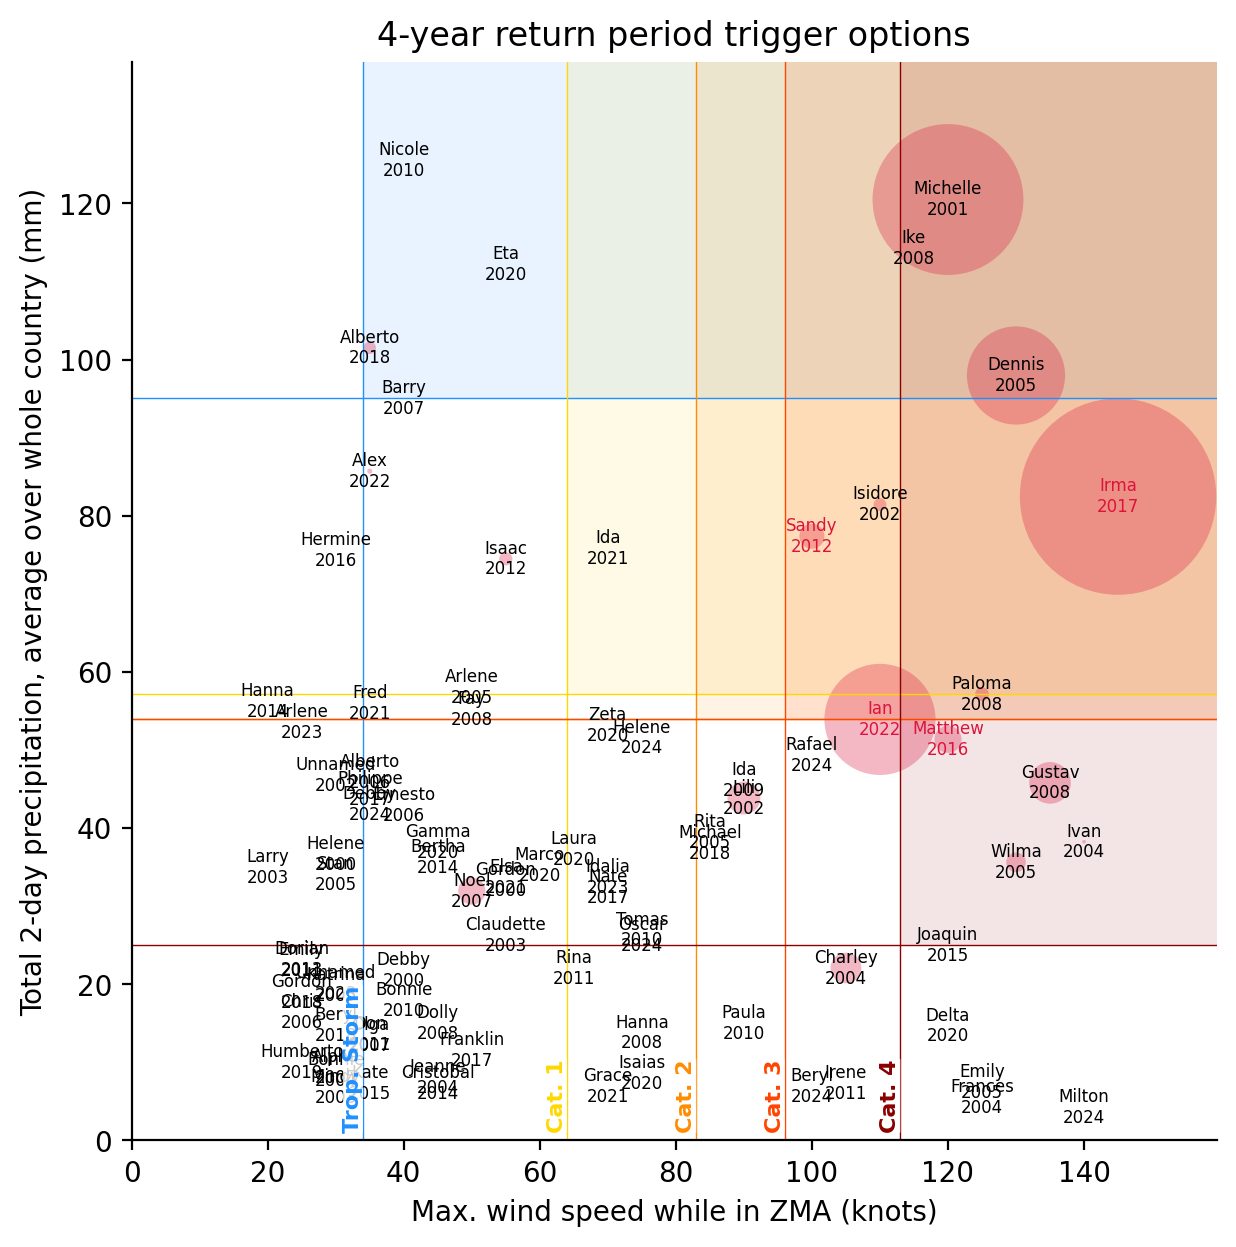

In [270]:
fig, ax = plt.subplots(dpi=200, figsize=(7, 7))

ymax = df_stats_complete["max_roll2_mean"].max() * 1.1
xmax = df_stats_complete["wind_speed_max"].max() * 1.1

# Bubble sizes (handle NaNs as zero)
bubble_sizes = df_stats_complete["Total Affected"].fillna(0)
# Optional: scale for visual clarity
bubble_sizes_scaled = (
    bubble_sizes / bubble_sizes.max() * 5000
)  # Adjust 300 as needed

# Plot bubbles
ax.scatter(
    df_stats_complete["wind_speed_max"],
    df_stats_complete["max_roll2_mean"],
    s=bubble_sizes_scaled,
    alpha=0.3,
    color="crimson",
    edgecolor="none",
    zorder=1,
)

for _, row in df_stats_complete.iterrows():
    ax.annotate(
        row["name"].capitalize() + "\n" + str(row["season"]),
        (row["wind_speed_max"], row["max_roll2_mean"]),
        ha="center",
        va="center",
        fontsize=6,
        color="crimson" if row["cerf"] else "k",
    )

for cat_name, row in df_threshs.set_index("cat").iterrows():
    if cat_name is None:
        continue
    color = cat_colors[cat_name]
    ax.axhline(row["max_roll2_mean"], color=color, linewidth=0.5)
    ax.axvline(row["wind_speed_max"], color=color, linewidth=0.5)
    ax.add_patch(
        patches.Rectangle(
            (row["wind_speed_max"], row["max_roll2_mean"]),  # bottom left
            xmax - row["wind_speed_max"],  # width
            ymax - row["max_roll2_mean"],  # height
            facecolor=color,
            alpha=0.1,
            zorder=0,
        )
    )
    ax.annotate(
        cat_name,
        (row["wind_speed_max"], 1),
        va="bottom",
        ha="right",
        color=color,
        rotation=90,
        fontweight="bold",
        fontsize=8,
        bbox=dict(
            boxstyle="round,pad=0",
            facecolor="white",  # Highlight color
            edgecolor="none",  # No border
            alpha=0.8,  # Transparency
        ),
    )


ax.set_xlim(left=0, right=xmax)
ax.set_ylim(bottom=0, top=ymax)

ax.set_xlabel("Max. wind speed while in ZMA (knots)")
ax.set_ylabel("Total 2-day precipitation, average over whole country (mm)")
ax.set_title(f"{target_rp}-year return period trigger options")

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

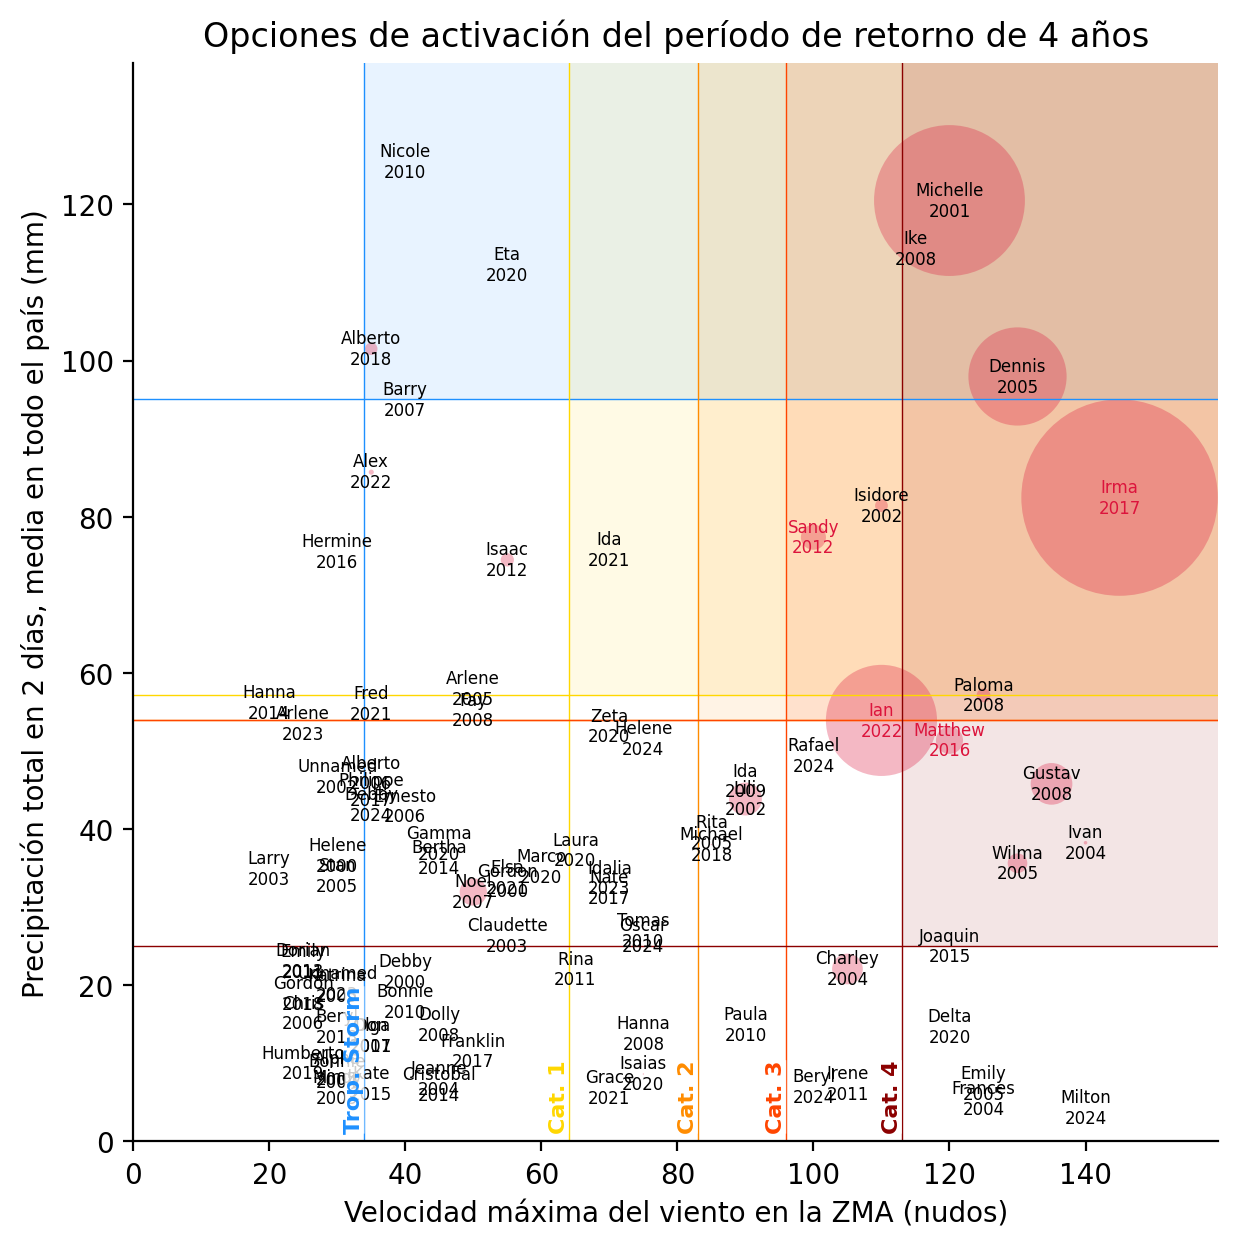

In [271]:
fig, ax = plt.subplots(dpi=200, figsize=(7, 7))

ymax = df_stats_complete["max_roll2_mean"].max() * 1.1
xmax = df_stats_complete["wind_speed_max"].max() * 1.1

# Bubble sizes (handle NaNs as zero)
bubble_sizes = df_stats_complete["Total Affected"].fillna(0)
# Optional: scale for visual clarity
bubble_sizes_scaled = (
    bubble_sizes / bubble_sizes.max() * 5000
)  # Adjust 300 as needed

# Plot bubbles
ax.scatter(
    df_stats_complete["wind_speed_max"],
    df_stats_complete["max_roll2_mean"],
    s=bubble_sizes_scaled,
    alpha=0.3,
    color="crimson",
    edgecolor="none",
    zorder=1,
)

for _, row in df_stats_complete.iterrows():
    ax.annotate(
        row["name"].capitalize() + "\n" + str(row["season"]),
        (row["wind_speed_max"], row["max_roll2_mean"]),
        ha="center",
        va="center",
        fontsize=6,
        color="crimson" if row["cerf"] else "k",
    )

for cat_name, row in df_threshs.set_index("cat").iterrows():
    if cat_name is None:
        continue
    color = cat_colors[cat_name]
    ax.axhline(row["max_roll2_mean"], color=color, linewidth=0.5)
    ax.axvline(row["wind_speed_max"], color=color, linewidth=0.5)
    ax.add_patch(
        patches.Rectangle(
            (row["wind_speed_max"], row["max_roll2_mean"]),  # bottom left
            xmax - row["wind_speed_max"],  # width
            ymax - row["max_roll2_mean"],  # height
            facecolor=color,
            alpha=0.1,
            zorder=0,
        )
    )
    ax.annotate(
        cat_name,
        (row["wind_speed_max"], 1),
        va="bottom",
        ha="right",
        color=color,
        rotation=90,
        fontweight="bold",
        fontsize=8,
        bbox=dict(
            boxstyle="round,pad=0",
            facecolor="white",  # Highlight color
            edgecolor="none",  # No border
            alpha=0.8,  # Transparency
        ),
    )


ax.set_xlim(left=0, right=xmax)
ax.set_ylim(bottom=0, top=ymax)

ax.set_xlabel("Velocidad máxima del viento en la ZMA (nudos)")
ax.set_ylabel("Precipitación total en 2 días, media en todo el país (mm)")
ax.set_title(
    f"Opciones de activación del período de retorno de {target_rp} años"
)


ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)